# Sales Conversion Optimization

**Content:**

The data used in this project is from an anonymous organisation’s social media ad campaign.

1.) **ad_id**: an unique ID for each ad.

2.) **xyzcampaignid**: an ID associated with each ad campaign of XYZ company.

3.) **fbcampaignid**: an ID associated with how Facebook tracks each campaign.

4.) **age**: age of the person to whom the ad is shown.

5.) **gender**: gender of the person to whim the add is shown

6.) **interest**: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) **Impressions**: the number of times the ad was shown.

8.) **Clicks**: number of clicks on for that ad.

9.) **Spent**: Amount paid by company xyz to Facebook, to show that ad.

10.) **Total conversion**: Total number of people who enquired about the product after seeing the ad.

11.) **Approved conversion**: Total number of people who bought the product after seeing the ad.

**Goal:** 

Optimizing conversion rate and predicting future sales

### **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="ticks")

%matplotlib inline

### **Loading dataset**

In [2]:
df=pd.read_csv('KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
## No NULL values detected
## 7 Features are int, 2 are floats and the rest are object types

In [6]:
df.shape

(1143, 11)

In [7]:
## We have 1143 rows and 11 columns

In [8]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [9]:
print("The customers age is divided in 4 groups: ")
print(df.age.unique())

The customers age is divided in 4 groups: 
['30-34' '35-39' '40-44' '45-49']


 ### Let's try to find correlations in our data and do some exploratory data analysis

<AxesSubplot:>

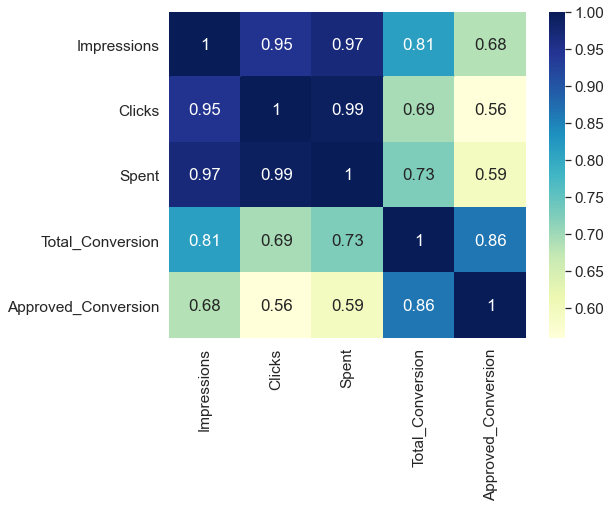

In [10]:
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True , cmap='YlGnBu')

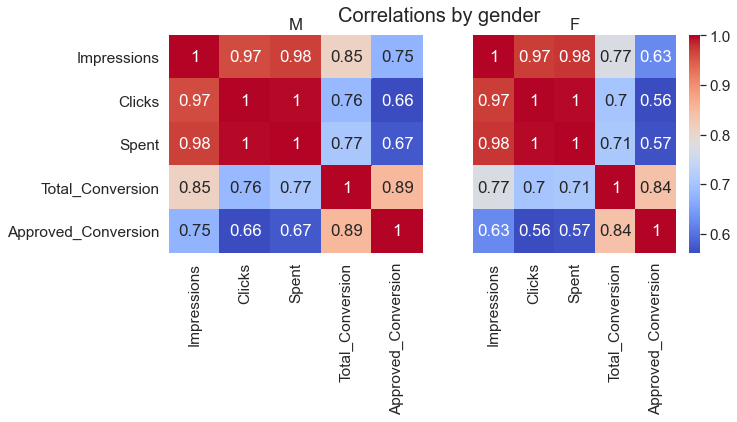

In [11]:
f, axes = plt.subplots(1, 2, figsize=(10,4))
f.suptitle("Correlations by gender",fontsize=20)
for i,gender in enumerate(df['gender'].unique()):
    axes[i].set_title(gender)
    sns.set(font_scale=1.4)
    sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]][df['gender']==gender].corr(),annot=True ,cbar=False if i!=1 else True, cmap='coolwarm',ax=axes[i],yticklabels=False if i>0 else True)

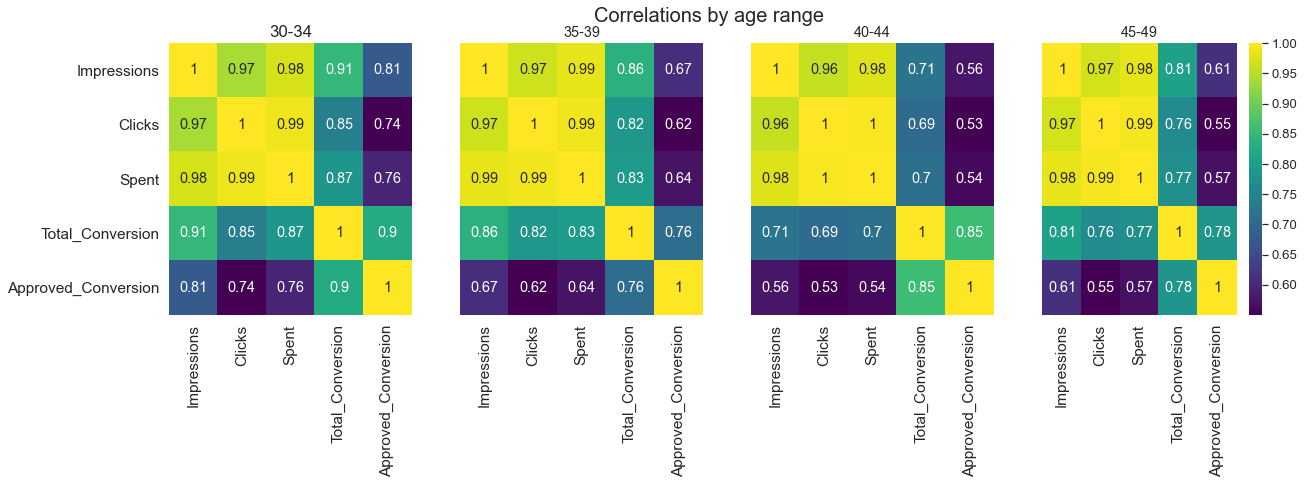

In [12]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
f.suptitle("Correlations by age range",fontsize=20)
for i,age in enumerate(df['age'].unique()):
    axes[i].set_title(age)
    sns.set(font_scale=1.2)
    sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]][df['age']==age].corr(),annot=True ,cbar=False if i!=3 else True, cmap='viridis',ax=axes[i],yticklabels=False if i>0 else True)

**There are 3 different campaigns**

**Let's change the labels of the campaigns so that they are easier to understand**

In [13]:
df["xyz_campaign_id"].replace({916:"campaign_a",936:"campaign_b",1178:"campaign_c"}, inplace=True)


**Now let's group the DataFrame by gender, age and campaign**

In [14]:
bygender= df[["gender","Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].groupby('gender').sum().join(df['gender'].value_counts().rename("People per gender"))
bygender['CAC']=bygender['Spent']/bygender['People per gender']
bygender

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,People per gender,CAC
gender,,,,,,,
F,114862847,23878,34502.619963,1644,495,551,62.618185
M,98571981,14287,24202.609995,1620,584,592,40.882787


In [15]:
byage = df[["gender","age","Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].groupby('age').sum().join(df['age'].value_counts().rename("People per age"))
byage['CAC']=byage['Spent']/byage['People per age']
byage

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,People per age,CAC
age,,,,,,,
30-34,67993019,9483,15252.399986,1431,494,426,35.803756
35-39,42104644,7094,11112.429994,626,207,248,44.808185
40-44,39604307,7736,11589.729981,523,170,210,55.189190
45-49,63732858,13852,20750.669997,684,208,259,80.118417


In [16]:
bycamp= df[["gender","age","Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion",'xyz_campaign_id']].groupby('xyz_campaign_id').sum().join(df['xyz_campaign_id'].value_counts().rename("Number of campaigns"))
bycamp['CAC']=bycamp['Spent']/bycamp['Number of campaigns']
bycamp

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Number of campaigns,CAC
xyz_campaign_id,,,,,,,
campaign_a,482925,113,149.710001,58,24,54,2.772407
campaign_b,8128187,1984,2893.369999,537,183,464,6.235711
campaign_c,204823716,36068,55662.149959,2669,872,625,89.059440


Text(0.5, 1.0, 'Customer Acquisition Cost')

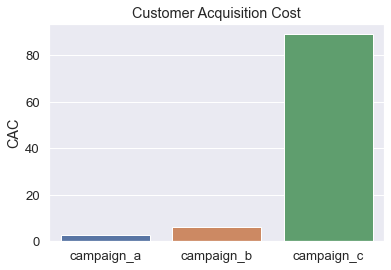

In [17]:
sns.barplot(x=bycamp.index.to_list(),y=bycamp['CAC']).set_title('Customer Acquisition Cost')

## Initial questions 

* Which gender and age group showed a higher conversion rate?
* Which marketing campaign was more effective and why?
* What changes could we do to the marketing strategy? How could we make it more effective while spending less?
* How are people's interests related?
* How does the number of impressions relate with the conversion rate?
* What is the CAC (Cost of Acquisition) of each customer?

In [18]:
print("First, we should know how many different campaigns there are:")
print(df.xyz_campaign_id.unique())

First, we should know how many different campaigns there are:
['campaign_a' 'campaign_b' 'campaign_c']


In [19]:
# Let's make a plot of the campaign vs conversion rate

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='count'>

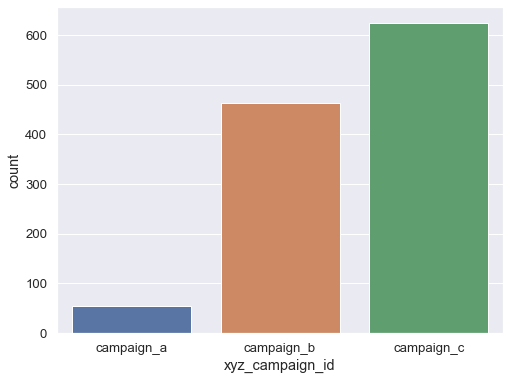

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='xyz_campaign_id')

In [21]:
## Campaign C has more number of ads
## Let's graph the campaigns vs approved conversion rate

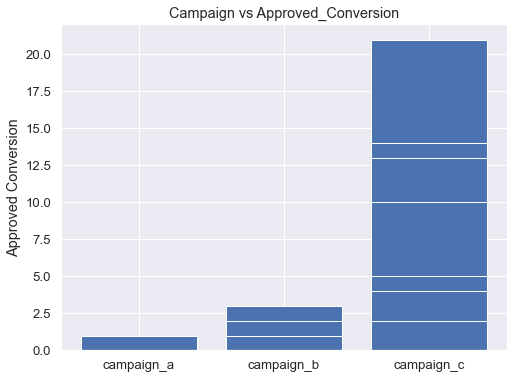

In [22]:
plt.figure(figsize=(8,6))
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel("Approved Conversion")
plt.title("Campaign vs Approved_Conversion")
plt.show()

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

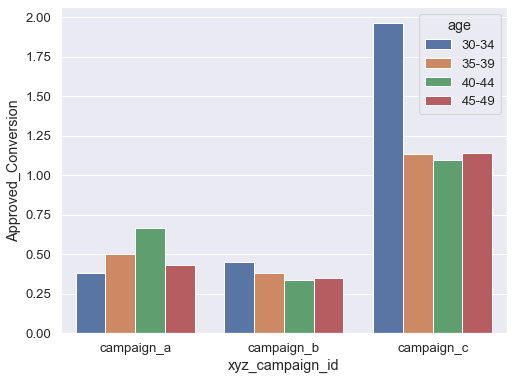

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"],ci=None)

**We can see that in campaign_c and campaign_b, the age group of 30-34 presented more interest, whereas in campaign_a the age group of 40-44 presented more interest**


In [24]:
## Let's plot the same bar plot, but by gender

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

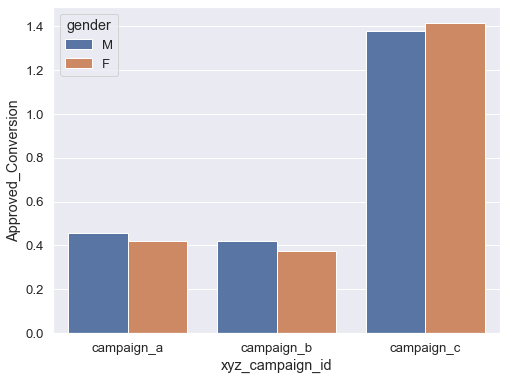

In [25]:
plt.figure(figsize=(8,6))

sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"],ci=None)

**As we can see, both genders presented similar interest in the three different campaigns**

In [26]:
## Now let's work with people's interests

Text(336.9714285714286, 0.5, 'Approved_Conversion')

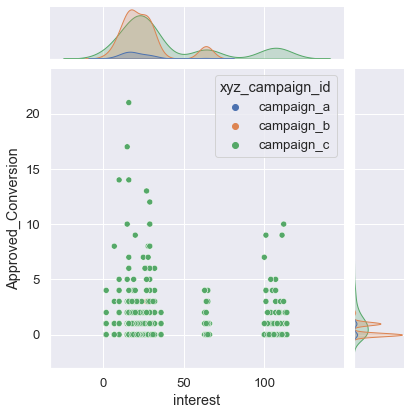

In [27]:
sns.jointplot(x="interest", y="Approved_Conversion",data=df,hue='xyz_campaign_id')
plt.xlabel("interest")
plt.ylabel("Approved_Conversion")


**As we can see, although most interests come from Campaign C, Campaign B people's interests center around 20, whereas Campaign C people's interests center around 25, ranging from 2 to 36.** 

**We can also notice that Campaign C people also have interests between 100 and 117.**

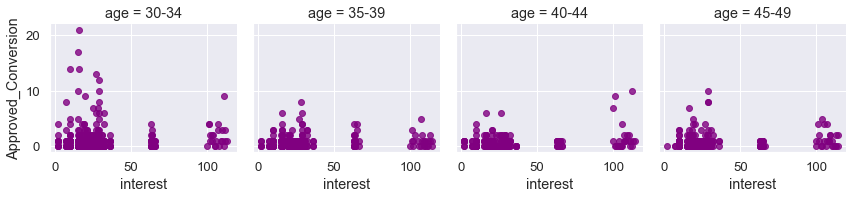

In [28]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.8,color='purple')
g.add_legend();


**As we can see, the scatter plots above are quite similar, except for age group 30-34 that has a higher approved conversion rate, as we already know**

In [29]:
## Let's now work with the money spent

Text(0, 0.5, 'Frequency')

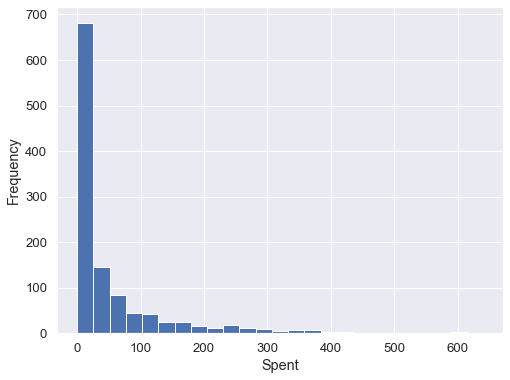

In [30]:
plt.figure(figsize=(8,6))
plt.hist(df['Spent'], bins = 25)
plt.xlabel("Spent")
plt.ylabel("Frequency")

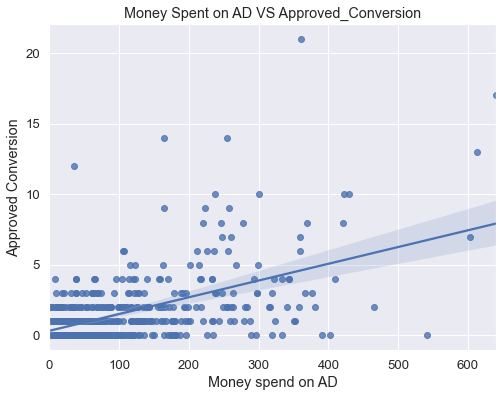

In [31]:
plt.figure(figsize=(8,6))
sns.regplot(x="Spent", y="Approved_Conversion",data=df)
plt.title("Money Spent on AD VS Approved_Conversion")
plt.xlabel("Money spend on AD")
plt.ylabel("Approved Conversion")
plt.show()

In [32]:
print("Correlation between money spent and approved conversion: ",df['Spent'].corr(df['Approved_Conversion']))

Correlation between money spent and approved conversion:  0.5931778159062021


**As we can see, there is a moderate positive correlation between the money spent on AD and the approved conversion**

In [33]:
##Now let's work with impressions and clicks, and their relation with approved conversion

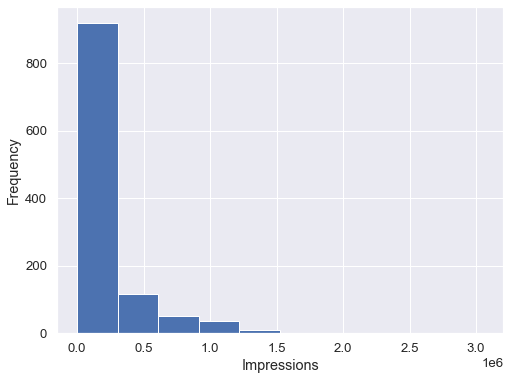

In [34]:
plt.figure(figsize=(8,6))
plt.hist(df['Impressions'], bins = 10)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Approved_Conversion')

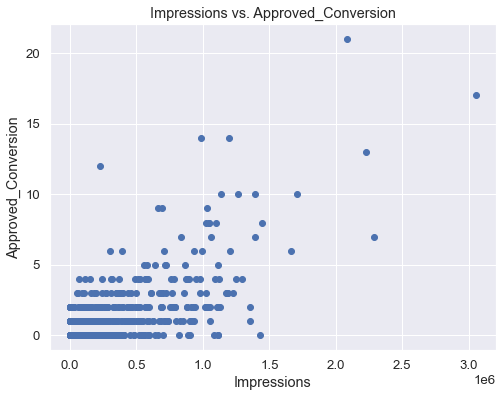

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")

In [36]:
print("Correlation between impressions and approved conversion: ",df['Impressions'].corr(df['Approved_Conversion']))

Correlation between impressions and approved conversion:  0.6842485153743517


**As we can see, there is a fairly positive correlation between impressions and the approved conversion.**

**There is also a rise in Approved Conversions after a certain point of Impressions.**

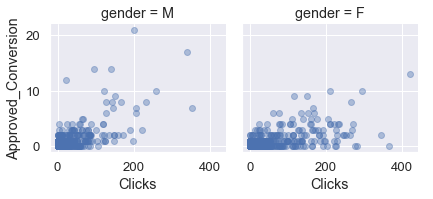

In [37]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();


**It looks like women tend to click more than men, but men buy more products after clicking the add.**

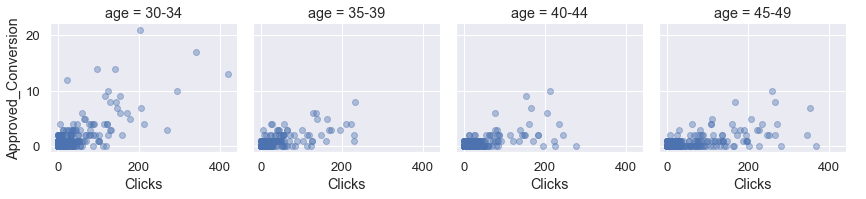

In [38]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

**People who are 30-34 years old has more tendency to buy the product after clicking the add.**


In [39]:
##Let's analyze who bought the product after enquiring about it

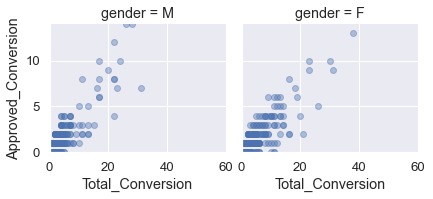

In [40]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.set(xlim=(0, 60), ylim=(0, 14));
g.add_legend();

**It looks like men buy more products than women after enquiring the product. However women tend to enquire more about the product.**

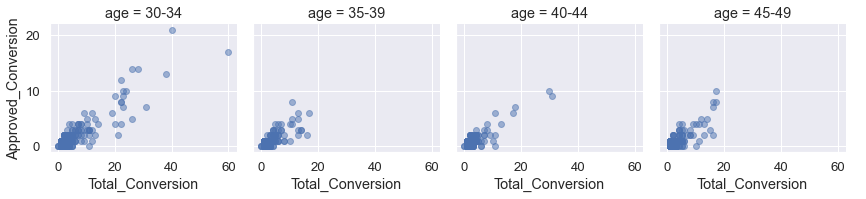

In [41]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

**It seems that people in age group 30-34 are more likely to buy the product after enquiring it.**

# Overview

**Correlations:**
* Approved Conversion is more correlated with number of impressions than Clicks and Money spent on ad, and highly correlated with Total Conversion

* Total conversion is also highly correlated with number of impressions

**Campaigns:**
* Campaign C has most number of ads and best approved conversion rate
**Age group:**
* In campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.

**Gender:**
* More money was spent on women with less approved conversion

**Money spent:**
* There is a moderate positive correlation between money spend on AD and approved conversion

**Product bought after clicking the ad:**
* It looks like women tend to click more than men, but men buy more products after clicking the add.

* People who are 30-34 years old has more tendency to buy the product after clicking the add.

**Product bought after enquiring the ad:**
* It looks like men buy more products than women after enquiring the product. However women tend to enquire more about the product.

* It seems people in age group 30-34 are more likely to buy the product after enquiring the product.



## Marketing Campaign Improvement

**Which marketing campaign should we focus on?**

As most purchases came from Campaign C (with less money spend), we should focus on that campaign:
    
* Campaign C possesses the best results and profits, despite the cost.

* However, Campaign A should also be given a little more attention. Although approved conversion rate was lower, customer acquisition cost (CAC) also was.

**Which demografic group should we focus on?**

* We should focus on 30-34 years old men, since approved conversion rate is higher and less money was spent on them.

* Less money should be spent on 40-44 and 45-49 age groups and women (all ages), since the approved conversion rate is lower.

* People with interest types up to 35 and after 100 should be given more attention, since there are potential buyers there.

**Which creative strategy could we use in the future?

* We should increase the number of ad exposure (impressions) since it's highly correlated with total conversion rate. 

* Therefore, it would be a good idea to use inexpensive ads with high exposure to get potential customers to enquire about the product. Other marketing strategies could be used to get them to buy the product. I.e: pricing strategy, brand image, market positioning, quality.

## Modelling and predictions

In [42]:
##Let's encode age and gender for better processing

In [43]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df["gender"])
df["gender"]=encoder.transform(df["gender"])

In [44]:
encoder.fit(df["age"])
df["age"]=encoder.transform(df["age"])

In [45]:
df["xyz_campaign_id"].replace({"campaign_a":916 ,"campaign_b":936 ,"campaign_c":1178}, inplace=True)

In [46]:
#Let's do some feature scalling 

In [47]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,0,1,15,7350,1,1.43,2,1
1,708749,916,103917,0,1,16,17861,2,1.82,2,0
2,708771,916,103920,0,1,20,693,0,0.00,1,0
3,708815,916,103928,0,1,28,4259,1,1.25,1,0
4,708818,916,103928,0,1,28,4133,1,1.29,1,1


In [48]:
x=np.array(df.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(df["Total_Conversion"])

from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)

In [49]:
#Now we divide into test and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

**Now let's try different algorithms**

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
predictions=lr.predict(x_test)

In [54]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, predictions)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
r2=r2_score(y_test, predictions)
print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MAE:  1.1112286791118697
MSE:  4.361634822883802
RMSE:  2.088452734175184
R2:  0.7685295088145678


**We notice that a Linear Regression model is not very accurate. Let's try with Random Forest Regressor**

In [55]:
from sklearn.ensemble import RandomForestRegressor
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

**Predicting Total Conversion in test_set and rounding up values**

In [56]:
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2_score)

MAE:  0.9912663755458515
MSE:  4.6593886462882095
RMSE:  2.158561707778633
R2:  0.7530816415210646


**Using both Machine Learning Algorithms, we got R2-score approximately equal to 0.75, which means 75% of the data fits our models**